In [23]:
import pandas as pd
import pytrends
from pytrends.request import TrendReq
pytrend = TrendReq()
from string import ascii_uppercase
import matplotlib.pyplot as plt



In [16]:
KEYWORDS = ['Fast Fashion', 'Sustainable Fashion', 'Missguided', 'Greenwashing']
KEYWORDS_CODES = [pytrend.suggestions(keyword=i)[0] for i in KEYWORDS]
df_CODES = pd.DataFrame(KEYWORDS_CODES)
df_CODES

,mid,title,type
0,/m/04y5l_6,Fast fashion,Topic
1,/m/02x01t8,Sustainable fashion,Topic
2,/g/11c3ywbhfg,Missguided,Topic
3,/m/01w1qb,Greenwashing,Topic


In [17]:
EXACT_KEYWORDS=df_CODES['mid'].to_list()
DATE_INTERVAL='2017-01-01 2021-01-01'
COUNTRY=['GB'] #Use this link for iso country code
CATEGORY=0 # Use this link to select categories
SEARCH_TYPE='' #default is 'web searches',others include 'images','news','youtube','froogle' (google shopping)

In [18]:
Individual_EXACT_KEYWORD = list(zip(*[iter(EXACT_KEYWORDS)]*1))
Individual_EXACT_KEYWORD = [list(x) for x in Individual_EXACT_KEYWORD]
dicti = {}
i = 1
for Country in COUNTRY:
    for keyword in Individual_EXACT_KEYWORD:
        pytrend.build_payload(kw_list=keyword,
                              timeframe = DATE_INTERVAL,
                              geo = Country,
                              cat=CATEGORY,
                              gprop=SEARCH_TYPE)
        dicti[i] = pytrend.interest_over_time()
        i+=1
df_trends = pd.concat(dicti, axis=1)
df_trends

#df_trends.to_csv('data/google_trends.csv', encoding='utf-8')

1                    2                       3            \
           /m/04y5l_6 isPartial /m/02x01t8 isPartial /g/11c3ywbhfg isPartial   
date                                                                           
2017-01-01          5     False         12     False            41     False   
2017-01-08         14     False         17     False            38     False   
2017-01-15         18     False         14     False            45     False   
2017-01-22         12     False         24     False            53     False   
2017-01-29          7     False         17     False            52     False   
...               ...       ...        ...       ...           ...       ...   
2020-11-29         91     False         60     False            25     False   
2020-12-06         70     False         48     False            23     False   
2020-12-13         53     False         48     False            22     False   
2020-12-20         39     False         32     False            19     False   
2020-12-27         49     False         61     False            22     False   

                   4            
           /m/01w1qb isPartial  
date                            
2017-01-01        21     False  
2017-01-08        39     False  
2017-01-15        59     False  
2017-01-22        53     False  
2017-01-29        19     False  
...              ...       ...  
2020-11-29        91     False  
2020-12-06        48     False  
2020-12-13        76     False  
2020-12-20        36     False  
2020-12-27        49     False  

[209 rows x 8 columns]

In [19]:
df_trends.columns = df_trends.columns.droplevel(0) #drop outside header
df_trends = df_trends.drop('isPartial', axis = 1) #drop "isPartial"
df_trends.reset_index(level=0,inplace=True) #reset_index
df_trends.columns=['date','Fast Fashion', 'Sustainable Fashion','Missguided', 'Greenwashing'] #change column names
print(df_trends.columns)
print(df_trends.columns.shape)
df_trends

Index(['date', 'Fast Fashion', 'Sustainable Fashion', 'Missguided',
       'Greenwashing'],
      dtype='object')
(5,)


,date,Fast Fashion,Sustainable Fashion,Missguided,Greenwashing
0,2017-01-01,5,12,41,21
1,2017-01-08,14,17,38,39
2,2017-01-15,18,14,45,59
3,2017-01-22,12,24,53,53
4,2017-01-29,7,17,52,19
...,...,...,...,...,...
204,2020-11-29,91,60,25,91
205,2020-12-06,70,48,23,48
206,2020-12-13,53,48,22,76
207,2020-12-20,39,32,19,36


<AxesSubplot:>

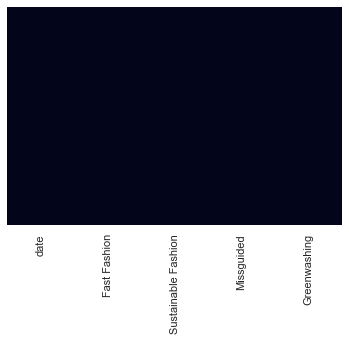

In [20]:
sns.heatmap(df_trends.isnull(),cbar=False,yticklabels=False) #shows no null values.

In [21]:
print(df_trends.describe())

       Fast Fashion  Sustainable Fashion  Missguided  Greenwashing
count    209.000000           209.000000  209.000000    209.000000
mean      34.143541            32.985646   39.440191     39.406699
std       18.345993            15.195988   13.280897     23.678377
min        2.000000             8.000000   13.000000      0.000000
25%       19.000000            21.000000   28.000000     20.000000
50%       31.000000            29.000000   39.000000     36.000000
75%       48.000000            44.000000   48.000000     56.000000
max      100.000000           100.000000  100.000000    100.000000


<AxesSubplot:>

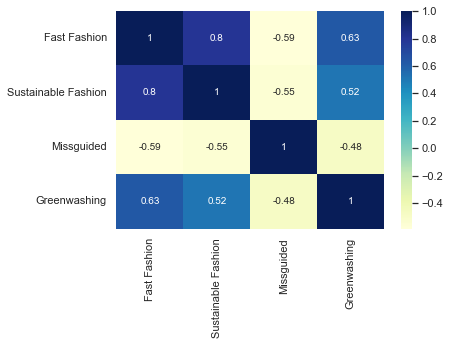

In [32]:
df_trends.corr()
plt.figure(figsize=(6,4))
sns.heatmap(df_trends.corr('pearson'),annot=True, cmap="YlGnBu") 


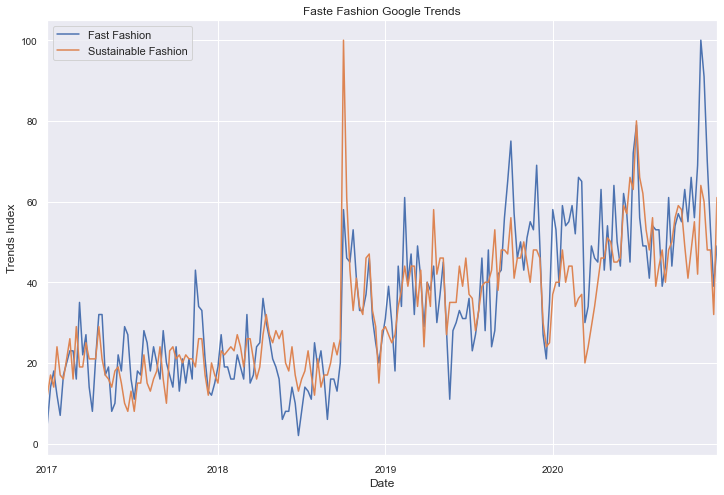

In [34]:
#sns.set(color_codes=True)
dx = df_trends.plot(figsize = (12,8),x="date", y=['Fast Fashion','Sustainable Fashion'], kind="line", title = "Faste Fashion Google Trends")
dx.set_xlabel('Date')
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='both', labelsize=10)

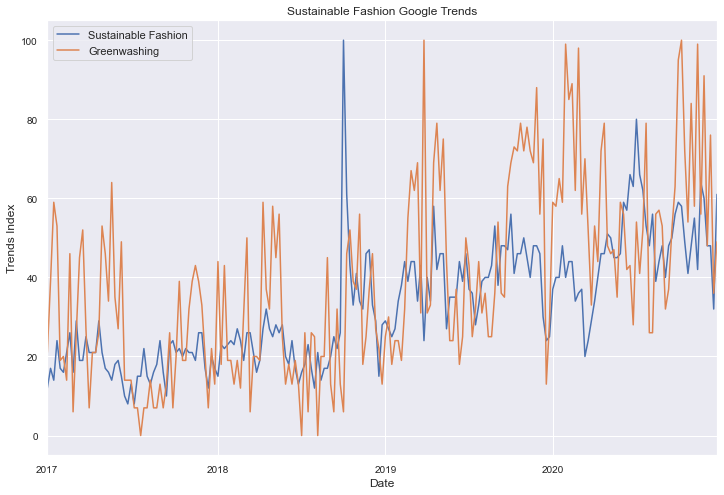

In [35]:
dx = df_trends.plot(figsize = (12,8),x="date", y=['Sustainable Fashion', 'Greenwashing'], kind="line", title = "Sustainable Fashion Google Trends")
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='both', labelsize=10)

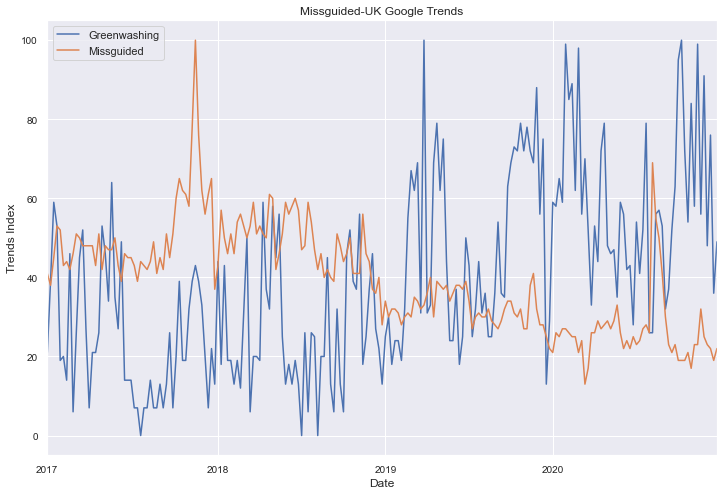

In [36]:
dx = df_trends.plot(figsize = (12,8),x="date", y=['Greenwashing','Missguided'], kind="line", title = "Missguided-UK Google Trends")
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='both', labelsize=10)